In [17]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

path = r'C:\Users\prave\Downloads\HW 1\Prob5\f.jpg'
firstimage= cv2.imread(path)
f = firstimage.copy()

gpA = [f]
for i in range(3):
    f = cv2.pyrDown(f)
    gpA.append(f)
    

lpA = [gpA[3]]

for i in range(3,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    
    
# p  = cv2.pyrUp(gpA[4])

# p1 = p+lpA[1]
# p2 = cv2.pyrUp(p1)
# p3 = p2+ lpA[2]
# p4 = cv2.pyrUp(p3)
# p5 = p4 +lpA[3]
# p6 = cv2.pyrUp(p5)
# p7 = p6 +lpA[4]

# now reconstruct
ls_ = gpA[3]
for i in range(1,4):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, lpA[i])


cv2.imwrite('check.jpg', ls_)

# plt.imshow(firstimage)
cv2.imwrite('orig.jpg', firstimage)

True

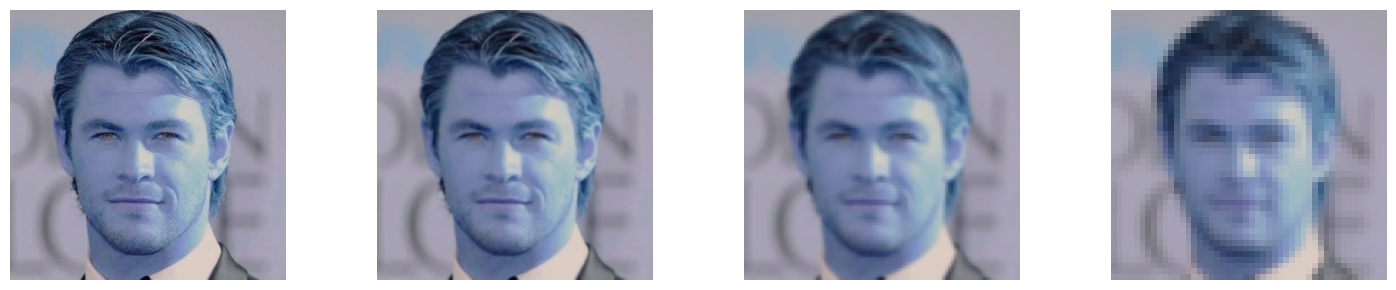

In [19]:
fig, axes = plt.subplots(1, len(gpA), figsize=(15, 3))

# Loop through images and add them to subplots
for i, image_path in enumerate(gpA):
    img = image_path
    scale_factor = 0.5**i if i > 0 else 1.0
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


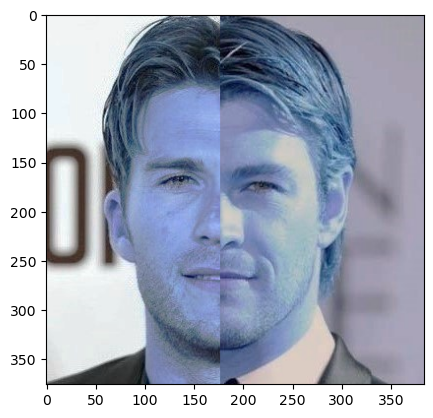

In [2]:
# Binary masks 

path = r'C:\Users\prave\Downloads\HW 1\Prob5\e.jpg'
path2 = r'C:\Users\prave\Downloads\HW 1\Prob5\f.jpg'
image= cv2.imread(path)
image2 = cv2.imread(path2)

# mask1 = image2
mask1 = np.zeros(image.shape, dtype=np.uint8)
mask2 = np.zeros(image2.shape, dtype=np.uint8)

mask1 = cv2.rectangle(mask1, (0, 384), (176, 0), (255,255,255), thickness=-1)

mask2 = cv2.rectangle(mask2, (177, 384), (384, 0), (255,255,255), thickness=-1)

# image, centre coordinates, radius, color, -1 means rather than thickness fill the shape 

# Mask input image with binary mask
result1 = cv2.bitwise_and(image, mask1)

result2 = cv2.bitwise_and(image2, mask2)

fin= result1+result2

plt.imshow(fin)
cv2.imwrite('fin.jpg', fin)


##################################################################################
alpha = float(0.5)
dst = cv2.addWeighted(image, alpha , image2, 1-alpha, 0)

# plt.imshow(dst)


######################################################################################





174 384 179 768
(376, 5, 3)


True

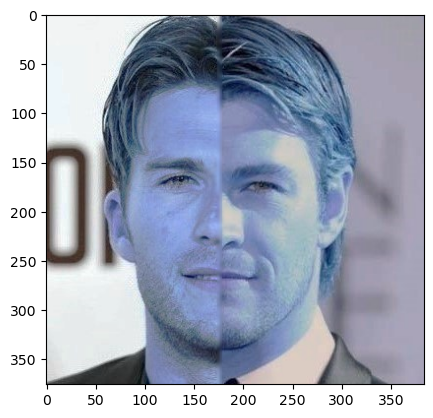

In [3]:

# Create ROI coordinates
topLeft = (174, 384)
bottomRight = (179, 0)

x, y = topLeft[0], topLeft[1]

w, h = bottomRight[0] - topLeft[0], - bottomRight[1] + topLeft[1]


print(x, y, x+w, y+h )
# Grab ROI with Numpy slicing and blur
ROI  = result1[0:y+h ,x:x+w]
ROI2 = result2[0:y+h, x:x+w]


blur1 = cv2.GaussianBlur(ROI, (7,7), 0) 
blur2 = cv2.GaussianBlur(ROI2, (7,7), 0) 

# # Insert ROI back into image
print(blur1.shape)

result1[0:y+h ,x:x+w] = blur1
result2[0:y+h, x:x+w] = blur2

final= result1+result2
plt.imshow(final)
cv2.imwrite('lol.jpg', final)


162 384 163 768
162
163 384 164 768
163
164 384 165 768
164
165 384 166 768
165
166 384 167 768
166
167 384 168 768
167
168 384 169 768
168
169 384 170 768
169
170 384 171 768
170
171 384 172 768
171
172 384 173 768
172
173 384 174 768
173
174 384 175 768
174
175 384 176 768
175
176 384 177 768
176
177 384 178 768
177
178 384 179 768
178
179 384 180 768
179
180 384 181 768
180
181 384 182 768
181
182 384 183 768
182
183 384 184 768
183
184 384 185 768
184
185 384 186 768
185
186 384 187 768
186
187 384 188 768
187
188 384 189 768
188
189 384 190 768
189
190 384 191 768
190
191 384 192 768
191
(376, 384, 3)


True

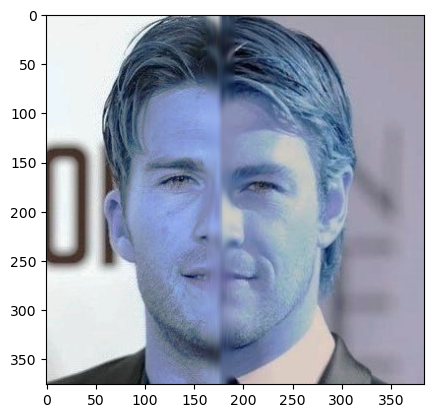

In [4]:

centre = 177
blur_start_value = centre-15
blur_end_value = centre+15
blur_effect_value=1
iterations= (blur_end_value-centre)*2//blur_effect_value

a= np.zeros(result1.shape)
b=np.zeros(result2.shape)
kernel=9

for i in range(iterations):
# Create ROI coordinates
    if i<iterations/2:
        topLeft = (blur_start_value + blur_effect_value*i , 384)
        bottomRight = (blur_start_value + blur_effect_value*(i+1), 0)
        kernel=kernel+2
        
    else:
        topLeft = (blur_start_value + blur_effect_value*i , 384)
        bottomRight = (blur_start_value + blur_effect_value*(i+1), 0)
        kernel=kernel-2
        

    x, y = topLeft[0], topLeft[1]

    w, h = bottomRight[0] - topLeft[0], - bottomRight[1] + topLeft[1]


    print(x, y, x+w, y+h )
    # Grab ROI with Numpy slicing and blur
    
    
    ROI  = result1[0:y+h ,x:x+w]
    ROI2 = result2[0:y+h, x:x+w]

    print(x)
    blur1 = cv2.GaussianBlur(ROI, (kernel,kernel), 0) 
    blur2 = cv2.GaussianBlur(ROI2, (kernel,kernel), 0) 
    
    a[0:y+h ,x:x+w]=blur1
    b[0:y+h ,x:x+w]=blur2
    

# # Insert ROI back into image

print(a.shape)

result1[0:376, blur_start_value:blur_end_value] = a[0:376, blur_start_value:blur_end_value]
result2[0:376, blur_start_value:blur_end_value] = b[0:376, blur_start_value:blur_end_value]

final= result1+result2




plt.imshow(final)
cv2.imwrite('lol2.jpg', final)


In [5]:
print(image.shape)
print(image2.shape)

(376, 384, 3)
(376, 384, 3)


In [6]:

f = image.copy()
g = image2.copy()
f1= np.zeros((8, 384,3),dtype=np.uint8)
g1= np.zeros((8, 384,3),dtype=np.uint8)
# f1 = cv2.pyrDown(f1)

# plt.imshow(f)
f= np.concatenate((f, f1),axis=0)
g= np.concatenate((g, g1),axis=0)


# plt.imshow(f)
# print(f.shape)

gpA1 = [f]
gpA2 = [g]

# plt.imshow(f)

for i in range(5):
    f = cv2.pyrDown(f)
    g = cv2.pyrDown(g)
    gpA1.append(f)
    gpA2.append(g)
    
    
    

lpA1 = [gpA1[5]]
lpA2 = [gpA2[5]]

for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA1[i])
    L = cv2.subtract(gpA1[i-1],GE)
    lpA1.append(L)
    
    GE = cv2.pyrUp(gpA2[i])
    L = cv2.subtract(gpA2[i-1],GE)
    lpA2.append(L)
    



In [7]:
print(f.shape)
print(g.shape)
print(len(lpA1))

(12, 12, 3)
(12, 12, 3)
6


5
11
22
44
88
176
6


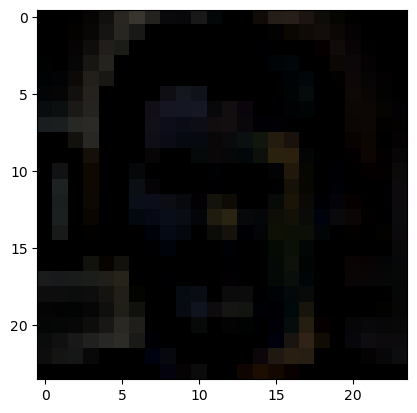

In [18]:
LS = []

count =0 
col=11

for la,lb in zip(lpA1,lpA2):
#     rows,cols,dpt = la.shape
    

    if count==0:
        cols=10
    else:
        cols = col*2
        col=cols
        
    print(cols//2)     # 176, 177
            


    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
    count=count+1
  
# print(len(LS))
# plt.imshow(LS[1])


    
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

True

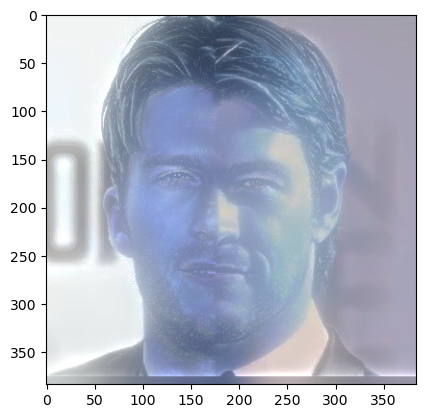

In [10]:
plt.imshow(ls_)
cv2.imwrite('Multi_blend.jpg', ls_)